In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape, x_test.shape)
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [2]:
model= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
print('model',model.summary())
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________
model None


In [7]:
# Functional API
input_layer = tf.keras.Input(shape=(28,28),name='InputLayer')
x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu',name='Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4 = tf.keras.layers.Dense(32, activation='relu', name='OutputLayer')(x3)
func_model = tf.keras.Model(inputs=input_layer, outputs= x4, name='FunctionModel')
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
func_model.summary()

Model: "FunctionModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 32)                2080      
                                                                 
Total params: 219,488
Trainable params: 219,488
Non-trainable params: 0
_________________________________________________________________


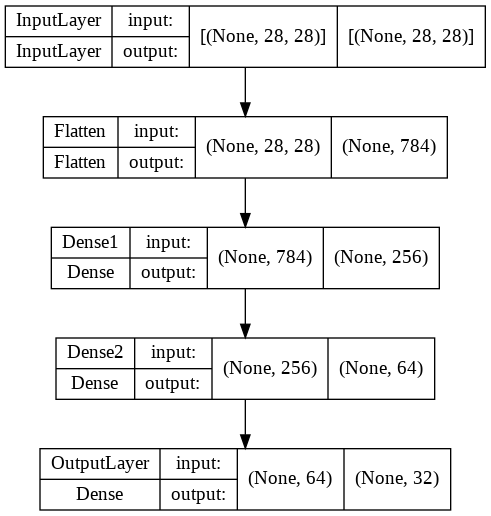

In [9]:
from tensorflow.keras.utils import plot_model
plot_model(func_model, show_shapes=True, show_layer_names=True,to_file='model.png')

In [10]:
func_model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 5ms/step - loss: 3.3878 - accuracy: 0.1445
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 3.3384 - accuracy: 0.1412
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 3.3195 - accuracy: 0.1423


In [11]:
from re import X
# Model subsclassing
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel,self).__init__()
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(256, activation='relu')
    self.dense2 = tf.keras.layers.Dense(64, activation='relu')
    self.dense3 = tf.keras.layers.Dense(10, activation='softmax')
  
  # calss overiding
  def call(self, x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x


In [12]:
mymodel = MyModel() # 모델 생성
mymodel._name = 'subclass_model'# 모델 이름 설정
mymodel(tf.keras.layers.Input(shape=(28,28)))# 모델 input 정의
mymodel.summary()# 모델 요약

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         multiple                  0         
                                                                 
 dense_4 (Dense)             multiple                  200960    
                                                                 
 dense_5 (Dense)             multiple                  16448     
                                                                 
 dense_6 (Dense)             multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________
